In [171]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
from pprint import pprint
import matplotlib.pyplot as plt

In [172]:
#MAPS
import gmaps

# Google developer API key
from config import gkey

# Access maps with unique API key
gmaps.configure(api_key=gkey)

In [192]:
# csv file path
df = "/Users/berelieta/Documents/HWBootcamp/project1/Resources/Fecha_defuncion.csv"

# Import csv file as a DataFrame
df = pd.read_csv(df,low_memory=False)
#Filtrar solo por muertes de coronavirus
dfcovid = df.drop(df[df['RESULTADO'] != 1].index)
dfcovid.head()

,RESULTADO,FECHA_DEF,ID_REGISTRO,SEXO,ENTIDAD_RES,MUNICIPIO_RES,FECHA_INGRESO,FECHA_SINTOMAS,EDAD,Sintomas a hospitalizacion,Sintomas a Defuncion
0,1,2020-06-18,02b80a,Mujer,MÉXICO,106,2020-06-12,2020-06-08,54,4 days 00:00:00.000000000,10 days 00:00:00.000000000
1,1,2020-05-02,1020c0,Mujer,JALISCO,39,2020-03-20,2020-03-20,56,0 days 00:00:00.000000000,43 days 00:00:00.000000000
2,1,2020-04-23,1a6201,Mujer,MÉXICO,121,2020-04-20,2020-04-20,78,0 days 00:00:00.000000000,3 days 00:00:00.000000000
3,1,2020-04-13,00c191,Mujer,CIUDAD DE MÉXICO,11,2020-04-07,2020-03-30,48,8 days 00:00:00.000000000,14 days 00:00:00.000000000
4,1,2020-07-16,1d8f4a,Mujer,BAJA CALIFORNIA,2,2020-06-26,2020-06-24,69,2 days 00:00:00.000000000,22 days 00:00:00.000000000


In [238]:
cities = dfcovid["ENTIDAD_RES"].unique()

print(cities)

['MÉXICO' 'JALISCO' 'CIUDAD DE MÉXICO' 'BAJA CALIFORNIA' 'QUINTANA ROO'
 'NUEVO LEÓN' 'NAYARIT' 'SINALOA' 'MICHOACÁN DE OCAMPO' 'YUCATÁN'
 'COAHUILA DE ZARAGOZA' 'TABASCO' 'TLAXCALA'
 'VERACRUZ DE IGNACIO DE LA LLAVE' 'HIDALGO' 'SONORA' 'CHIHUAHUA'
 'TAMAULIPAS' 'CHIAPAS' 'PUEBLA' 'GUERRERO' 'COLIMA' 'GUANAJUATO'
 'MORELOS' 'QUERÉTARO' 'DURANGO' 'AGUASCALIENTES' 'OAXACA' 'ZACATECAS'
 'SAN LUIS POTOSÍ' 'CAMPECHE' 'BAJA CALIFORNIA SUR']


In [258]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

column_names = ["City","Lat","Lng"]
results = []

# Build query URL
for city in cities:
    print(f'Processing Record of {len(cities)} | {city}')
    city_data = []
    # Build query URL
    query_url = url + "appid=" + api_key + "&q=" + city
    
    weather_response = requests.get(query_url, city).json()
    
    if weather_response.get("cod") and weather_response.get("cod") == '404':
        print(f'{city} not found. Skipping...')
        continue
    
    try:
        city_data.append(city)                                           # Append City name 
        city_data.append(weather_response["coord"]["lat"])               # Append City Lat
        city_data.append(weather_response["coord"]["lon"])               # Append City Long
        # Append city data to full data
        results.append(city_data)
        
    except:
        print(f'Unexpected issue with {city}: {weather_response}')

Processing Record of 32 | MÉXICO
Processing Record of 32 | JALISCO
Processing Record of 32 | CIUDAD DE MÉXICO
Processing Record of 32 | BAJA CALIFORNIA
Processing Record of 32 | QUINTANA ROO
Processing Record of 32 | NUEVO LEÓN
Processing Record of 32 | NAYARIT
Processing Record of 32 | SINALOA
Processing Record of 32 | MICHOACÁN DE OCAMPO
Processing Record of 32 | YUCATÁN
Processing Record of 32 | COAHUILA DE ZARAGOZA
Processing Record of 32 | TABASCO
Processing Record of 32 | TLAXCALA
Processing Record of 32 | VERACRUZ DE IGNACIO DE LA LLAVE
VERACRUZ DE IGNACIO DE LA LLAVE not found. Skipping...
Processing Record of 32 | HIDALGO
Processing Record of 32 | SONORA
Processing Record of 32 | CHIHUAHUA
Processing Record of 32 | TAMAULIPAS
Processing Record of 32 | CHIAPAS
Processing Record of 32 | PUEBLA
Processing Record of 32 | GUERRERO
Processing Record of 32 | COLIMA
Processing Record of 32 | GUANAJUATO
Processing Record of 32 | MORELOS
Processing Record of 32 | QUERÉTARO
Processing Re

In [260]:
# Converting to dataframe 
df = pd.DataFrame(results, columns=column_names)
df

,City,Lat,Lng
0,MÉXICO,19.43,-99.13
1,JALISCO,3.25,-76.54
2,CIUDAD DE MÉXICO,19.43,-99.13
3,BAJA CALIFORNIA,16.75,-97.50
4,QUINTANA ROO,19.67,-88.50
5,NUEVO LEÓN,25.67,-100.00
6,NAYARIT,22.00,-105.00
7,SINALOA,25.00,-107.50
8,MICHOACÁN DE OCAMPO,19.17,-101.83
9,YUCATÁN,20.83,-89.00


In [262]:
# Count how many covid have occured each state
mun_counts = dfcovid["ENTIDAD_RES"].value_counts().rename_axis('City').reset_index(name='Casos')

mun_counts = mun_counts[mun_counts.City != 'VERACRUZ DE IGNACIO DE LA LLAVE']

mun_counts

,City,Casos
0,MÉXICO,7908
1,CIUDAD DE MÉXICO,7109
3,BAJA CALIFORNIA,2601
4,PUEBLA,2268
5,SINALOA,2074
6,TABASCO,1852
7,SONORA,1796
8,JALISCO,1454
9,GUERRERO,1380
10,NUEVO LEÓN,964


In [263]:
merge_df = pd.merge(df,mun_counts, on="City", how="outer").sort_values(by=['City'])
merge_df

,City,Lat,Lng,Casos
25,AGUASCALIENTES,21.88,-102.30,242
3,BAJA CALIFORNIA,16.75,-97.50,2601
30,BAJA CALIFORNIA SUR,25.83,-111.83,155
29,CAMPECHE,19.00,-90.50,446
17,CHIAPAS,16.50,-92.50,941
15,CHIHUAHUA,28.50,-106.00,871
2,CIUDAD DE MÉXICO,19.43,-99.13,7109
10,COAHUILA DE ZARAGOZA,27.33,-102.00,590
20,COLIMA,19.17,-104.00,180
24,DURANGO,24.83,-104.83,272


In [264]:
locations = merge_df[["Lat".format(latitude), "Lng".format(longitude)]]
humidity = merge_df["Casos"]
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=5)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

# GRAFICA DE CASOS  POR ESTADO

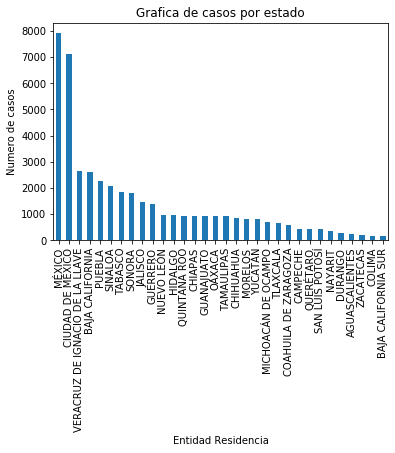

In [174]:
a = dfcovid["ENTIDAD_RES"].value_counts()
%matplotlib inline
a.plot(kind='bar')

plt.xlabel("Entidad Residencia")
plt.ylabel("Numero de casos")
plt.title("Grafica de casos por estado")

plt.show()

In [175]:
# Count how many covid have occured each state
mun_counts = dfcovid["ENTIDAD_RES"].value_counts()
mun_counts

MÉXICO                             7908
CIUDAD DE MÉXICO                   7109
VERACRUZ DE IGNACIO DE LA LLAVE    2661
BAJA CALIFORNIA                    2601
PUEBLA                             2268
SINALOA                            2074
TABASCO                            1852
SONORA                             1796
JALISCO                            1454
GUERRERO                           1380
NUEVO LEÓN                          964
HIDALGO                             963
QUINTANA ROO                        947
CHIAPAS                             941
GUANAJUATO                          924
OAXACA                              918
TAMAULIPAS                          914
CHIHUAHUA                           871
MORELOS                             825
YUCATÁN                             823
MICHOACÁN DE OCAMPO                 708
TLAXCALA                            672
COAHUILA DE ZARAGOZA                590
CAMPECHE                            446
QUERÉTARO                           426


In [176]:
# Count how many covid have occured each state
mun_counts = dfcovid["ENTIDAD_RES"].value_counts()
mun_counts

MÉXICO                             7908
CIUDAD DE MÉXICO                   7109
VERACRUZ DE IGNACIO DE LA LLAVE    2661
BAJA CALIFORNIA                    2601
PUEBLA                             2268
SINALOA                            2074
TABASCO                            1852
SONORA                             1796
JALISCO                            1454
GUERRERO                           1380
NUEVO LEÓN                          964
HIDALGO                             963
QUINTANA ROO                        947
CHIAPAS                             941
GUANAJUATO                          924
OAXACA                              918
TAMAULIPAS                          914
CHIHUAHUA                           871
MORELOS                             825
YUCATÁN                             823
MICHOACÁN DE OCAMPO                 708
TLAXCALA                            672
COAHUILA DE ZARAGOZA                590
CAMPECHE                            446
QUERÉTARO                           426


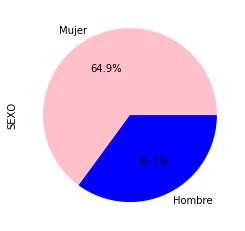

In [177]:
# Gender Mortality in MX
b = dfcovid["SEXO"].value_counts()
colors = ["pink","blue"]

%matplotlib inline
b.plot(kind='pie', colors= colors, autopct="%1.1f%%")
plt.show()

# CDMX

In [178]:
# clean municipios from cdmx
dfcovid = dfcovid.loc[dfcovid["ENTIDAD_RES"] == "CIUDAD DE MÉXICO", :]
dfcovid["MUNICIPIO_RES"] = dfcovid["MUNICIPIO_RES"].replace([11,5,12,2,13,7,15,16,17,3,6,10,14,4,8,9,999],['TLÁHUAC','GUSTAVO A. MADERO','TLALPAN','AZCAPOTZALCO','XOCHIMILCO','IZTAPALAPA','CUAUHTÉMOC','MIGUEL HIDALGO','VENUSTIANO CARRANZA','COYOACÁN','IZTACALCO','ÁLVARO OBREGÓN','BENITO JUÁREZ','CUAJIMALPA DE MORELOS','LA MAGDALENA CONTRERAS','MILPA ALTA','NO ESPECIFICADO'])
dfcovid.head()

,RESULTADO,FECHA_DEF,ID_REGISTRO,SEXO,ENTIDAD_RES,MUNICIPIO_RES,FECHA_INGRESO,FECHA_SINTOMAS,EDAD,Sintomas a hospitalizacion,Sintomas a Defuncion
3,1,2020-04-13,00c191,Mujer,CIUDAD DE MÉXICO,TLÁHUAC,2020-04-07,2020-03-30,48,8 days 00:00:00.000000000,14 days 00:00:00.000000000
7,1,2020-06-24,13e187,Mujer,CIUDAD DE MÉXICO,GUSTAVO A. MADERO,2020-06-23,2020-06-14,46,9 days 00:00:00.000000000,10 days 00:00:00.000000000
11,1,2020-04-26,0a1ca3,Mujer,CIUDAD DE MÉXICO,GUSTAVO A. MADERO,2020-04-19,2020-04-13,35,6 days 00:00:00.000000000,13 days 00:00:00.000000000
13,1,2020-05-02,010a3e,Hombre,CIUDAD DE MÉXICO,TLALPAN,2020-04-29,2020-04-18,69,11 days 00:00:00.000000000,14 days 00:00:00.000000000
14,1,2020-05-11,1b4884,Mujer,CIUDAD DE MÉXICO,AZCAPOTZALCO,2020-05-01,2020-05-01,51,0 days 00:00:00.000000000,10 days 00:00:00.000000000


In [179]:
# new df from cdmx
cdmx_df = dfcovid.loc[dfcovid["ENTIDAD_RES"]=="CIUDAD DE MÉXICO"]
cdmx_df

,RESULTADO,FECHA_DEF,ID_REGISTRO,SEXO,ENTIDAD_RES,MUNICIPIO_RES,FECHA_INGRESO,FECHA_SINTOMAS,EDAD,Sintomas a hospitalizacion,Sintomas a Defuncion
3,1,2020-04-13,00c191,Mujer,CIUDAD DE MÉXICO,TLÁHUAC,2020-04-07,2020-03-30,48,8 days 00:00:00.000000000,14 days 00:00:00.000000000
7,1,2020-06-24,13e187,Mujer,CIUDAD DE MÉXICO,GUSTAVO A. MADERO,2020-06-23,2020-06-14,46,9 days 00:00:00.000000000,10 days 00:00:00.000000000
11,1,2020-04-26,0a1ca3,Mujer,CIUDAD DE MÉXICO,GUSTAVO A. MADERO,2020-04-19,2020-04-13,35,6 days 00:00:00.000000000,13 days 00:00:00.000000000
13,1,2020-05-02,010a3e,Hombre,CIUDAD DE MÉXICO,TLALPAN,2020-04-29,2020-04-18,69,11 days 00:00:00.000000000,14 days 00:00:00.000000000
14,1,2020-05-11,1b4884,Mujer,CIUDAD DE MÉXICO,AZCAPOTZALCO,2020-05-01,2020-05-01,51,0 days 00:00:00.000000000,10 days 00:00:00.000000000
...,...,...,...,...,...,...,...,...,...,...,...
55682,1,2020-07-21,0f15b1,Hombre,CIUDAD DE MÉXICO,IZTAPALAPA,2020-07-18,2020-07-12,69,6 days 00:00:00.000000000,9 days 00:00:00.000000000
55687,1,2020-07-08,06c938,Hombre,CIUDAD DE MÉXICO,IZTAPALAPA,2020-07-03,2020-07-03,63,0 days 00:00:00.000000000,5 days 00:00:00.000000000
55729,1,2020-07-19,11f0d3,Mujer,CIUDAD DE MÉXICO,AZCAPOTZALCO,2020-07-16,2020-07-10,77,6 days 00:00:00.000000000,9 days 00:00:00.000000000
55747,1,2020-07-13,190bc8,Mujer,CIUDAD DE MÉXICO,IZTAPALAPA,2020-07-13,2020-07-04,63,9 days 00:00:00.000000000,9 days 00:00:00.000000000


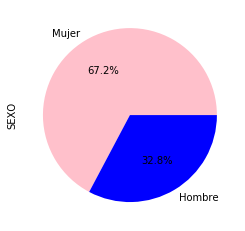

In [180]:
# Gender Mortality in CDMX
b = cdmx_df["SEXO"].value_counts()
colors = ["pink","blue"]

%matplotlib inline
b.plot(kind='pie', colors= colors, autopct="%1.1f%%")
plt.show()

In [181]:
# Count mortality in CDMX
gender_df = pd.DataFrame(cdmx_df["SEXO"].value_counts())
gender_df.head()

,SEXO
Mujer,4780
Hombre,2329


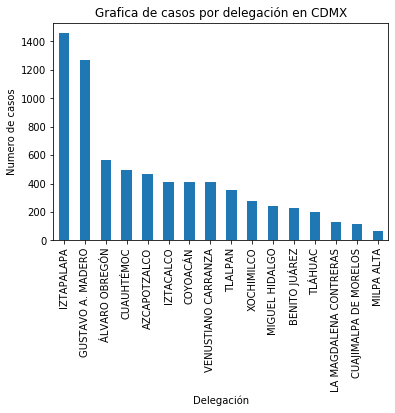

In [185]:
# GRAFICA DE CASOS POR DELEGACION

a = cdmx_df["MUNICIPIO_RES"].value_counts()
%matplotlib inline
a.plot(kind='bar')

plt.xlabel("Delegación")
plt.ylabel("Numero de casos")
plt.title("Grafica de casos por delegación en CDMX")

plt.show()